<a href="https://colab.research.google.com/github/sku1978/sk-share-repo/blob/main/ML/Decision-Trees-and-Random-Forests/Decision%20Tree%20Kyphosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [22]:
df=pd.read_csv('https://raw.githubusercontent.com/sku1978/sk-share-repo/main/ML/Decision-Trees-and-Random-Forests/kyphosis.csv')

#df.head()
df.info()
print("+++++++")
df.isnull().sum()*100/len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB
+++++++


Kyphosis    0.0
Age         0.0
Number      0.0
Start       0.0
dtype: float64

In [24]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


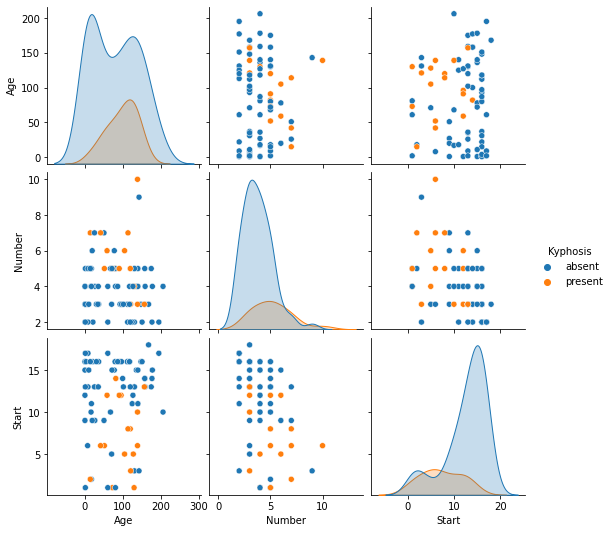

In [23]:
sns.pairplot(df, hue='Kyphosis')

In [58]:
X=df.drop('Kyphosis', axis=1)
y=df['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

# **Decision Tree**

In [59]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
predicted=dtc.predict(X_test)

In [60]:
pd.DataFrame(classification_report(y_test, predicted, output_dict=True)).transpose()

,precision,recall,f1-score,support
absent,0.714286,0.789474,0.750000,19.00000
present,0.333333,0.250000,0.285714,8.00000
accuracy,0.629630,0.629630,0.629630,0.62963
macro avg,0.523810,0.519737,0.517857,27.00000
weighted avg,0.601411,0.629630,0.612434,27.00000


In [61]:
pd.DataFrame(confusion_matrix(y_test, predicted), columns=['Predicted Negative', 'Predicted Positive'], index=['True Negative', 'True Positive'])

,Predicted Negative,Predicted Positive
True Negative,15,4
True Positive,6,2


# **Randon Tree**

In [62]:
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
predicted=rfc.predict(X_test)

In [63]:
pd.DataFrame(classification_report(y_test, predicted, output_dict=True)).transpose()

,precision,recall,f1-score,support
absent,0.760000,1.000000,0.863636,19.000000
present,1.000000,0.250000,0.400000,8.000000
accuracy,0.777778,0.777778,0.777778,0.777778
macro avg,0.880000,0.625000,0.631818,27.000000
weighted avg,0.831111,0.777778,0.726263,27.000000


In [64]:
pd.DataFrame(confusion_matrix(y_test, predicted), columns=['Predicted Negative', 'Predicted Positive'], index=['True Negative', 'True Positive'])

,Predicted Negative,Predicted Positive
True Negative,19,0
True Positive,6,2


In [69]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

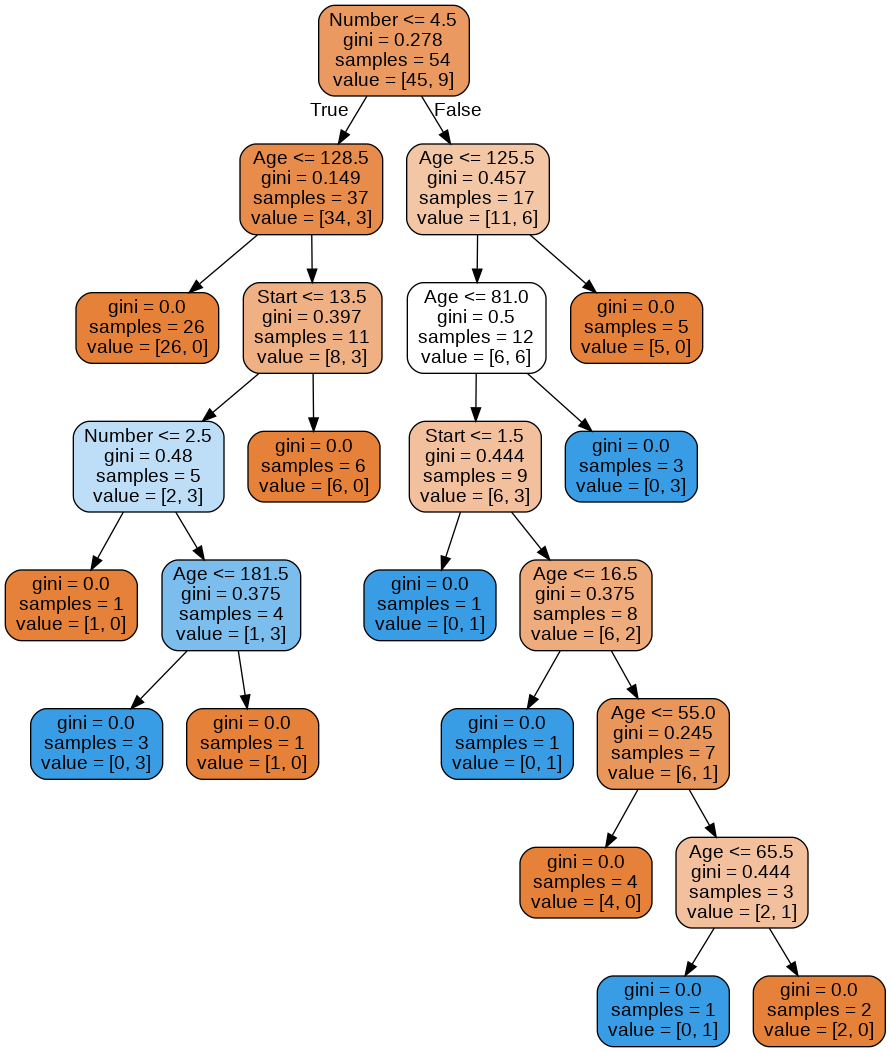

In [72]:
dot_data = StringIO()  
export_graphviz(dtc, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())